In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# tips 데이터셋 로드
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. 컬럼의 이름을 변경 -> [총금액, 팁, 성별, 흡연여부, 요일, 시간, 인원]
2. 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
3. 식사 인원과 성별에 따른 그룹화, 팁의 비울의 평균 값을 구하고 그래프 시각화(바그래프)

In [3]:
# 컬럼의 이름 변경
tips.columns = ['총금액', '팁', '성별', '흡연여부', '요일', '시간', '인원']

In [4]:
tips[['총금액', '팁']] = tips[['총금액', '팁']].round(1)

In [5]:
# 팁 비율 파생변수 생성
tips['팁 비율'] = tips['팁'] / tips['총금액'] * 100

In [6]:
# 그룹화
group_data = tips[['인원', '성별', '팁 비율']].groupby(['인원', '성별']).mean()

In [7]:
# 시각화
import matplotlib.pyplot as plt

<Axes: xlabel='인원,성별'>

C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54017 (\N{HANGUL SYLLABLE TIB}) missing from current font.
  func(*args, **kwargs)
C:\Users\이은진\AppData\Roaming\Python\Python311\site-

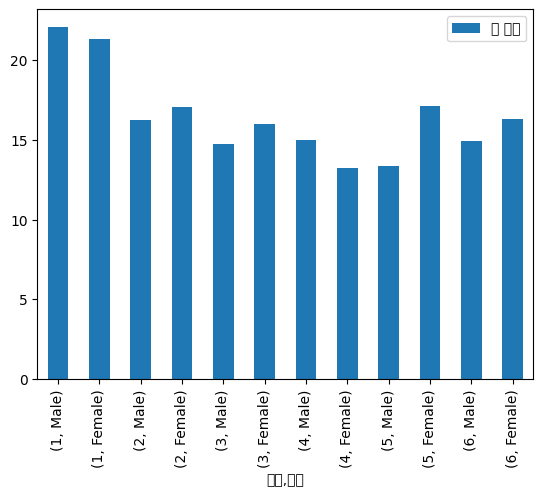

In [8]:
group_data.plot.bar()

In [9]:
import platform

In [10]:
# 그래프에서 한글 깨짐 방지
if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

In [11]:
group_data.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

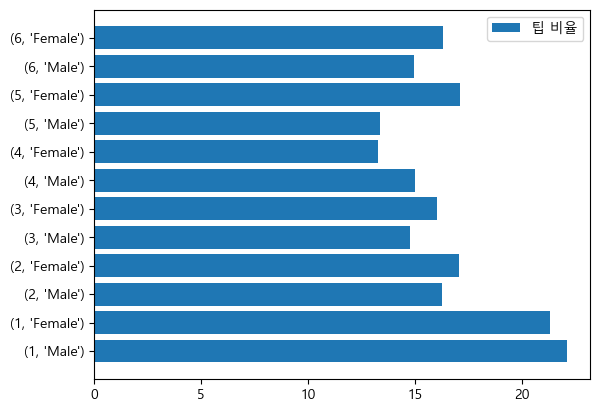

In [12]:
x = list(range(0, len(group_data.index), 1))
y = group_data['팁 비율']

plt.barh(x, y, label = '팁 비율')
plt.yticks(x, group_data.index)
plt.legend()
plt.show()

In [13]:
group_data

팁 비율
인원 성별               
1  Male    22.093023
   Female  21.322912
2  Male    16.273796
   Female  17.053626
3  Male    14.763093
   Female  16.025679
4  Male    15.017047
   Female  13.267871
5  Male    13.371547
   Female  17.114094
6  Male    14.953486
   Female  16.306239

In [14]:
# 남자의 데이터프레임
# 여자의 데이터프레임으로 나눈다
male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in group_data.index:
    if i[1] == 'Male':
        male_data = pd.concat([male_data, group_data.loc[[i]]])

    else:
        female_data = pd.concat([female_data, group_data.loc[[i]]])

In [15]:
male_data

,,팁 비율
인원,성별,
1,Male,22.093023
2,Male,16.273796
3,Male,14.763093
4,Male,15.017047
5,Male,13.371547
6,Male,14.953486


In [16]:
female_data

,,팁 비율
인원,성별,
1,Female,21.322912
2,Female,17.053626
3,Female,16.025679
4,Female,13.267871
5,Female,17.114094
6,Female,16.306239


In [17]:
list(range(2, len(female_data) * 2, 2))

[2, 4, 6, 8, 10]

### pivot table
1. 그룹화
2. 인덱스, 컬럼을 기준으로 그룹화
3. 데이터 집계 나타내기

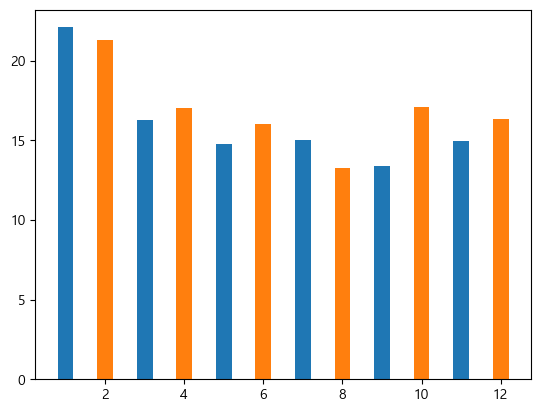

In [18]:
x = list(range(1, len(male_data) * 2, 2))
y = male_data['팁 비율']
x2 = list(range(2, (len(female_data) + 1) * 2, 2))
y2 = female_data['팁 비율']
plt.bar(x, y, width = 0.4)
plt.bar(x2, y2, width = 0.4)
plt.show()